In [43]:
import matplotlib.pyplot as plt
import torch

def target_wake(z):
    return (torch.tanh(z / 0.01) + 1) / 2 *-250

def wake_function(z, z0, k=2 * torch.pi):
    return -torch.cos(k * (z - z0)) * (torch.tanh((z - z0)  / 0.01) + 1) / 2

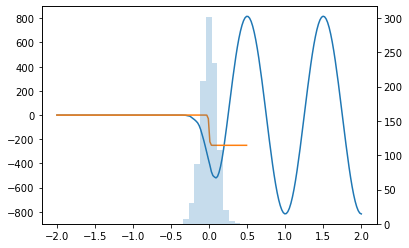

In [44]:
dist = torch.distributions.Normal(0.0, 0.1)
particles = dist.sample([1000,1])
z = torch.linspace(-2,2,200)

wake = wake_function(z, particles)

total_wake = torch.sum(wake,dim=0)
fig,ax = plt.subplots()
ax.plot(z, total_wake)
ax.plot(z[:125], target_wake(z[:125]))
axb = ax.twinx()
axb.hist(particles.numpy(), alpha=0.25);